# 1. Importing Visualization Libraries 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [14]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [15]:
# Import ".json" file for the U.S. 
country_geo = r'/Users/jacob/Desktop/Achievement 6/02 Data/Original Data/us-states.json'

In [17]:
# Define path

path = r'/Users/jacob/Desktop/Achievement 6'

In [18]:
# Import the data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'deaths_cases_gender.csv'), index_col = False)

/var/folders/5j/49cjqn4n79n3w8yw5rj_8hhh0000gn/T/ipykernel_69009/1982666549.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'deaths_cases_gender.csv'), index_col = False)


In [23]:
df.isnull().sum()

county_code              0
county                   0
state                    0
lat                      0
long                     0
date                     0
cases                    0
state_code           85399
deaths                   0
male                     0
female                   0
median_age               0
population               0
female_percentage        0
region                   0
dtype: int64

In [19]:
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
0,1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South
1,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South
2,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South
3,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South
4,5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South


In [25]:
# Use the isna() function to check for missing values in the specified column
column_to_check = 'state_code'
rows_with_missing_values = df[df[column_to_check].isna()]

# Print the rows with missing values
print(rows_with_missing_values)

         county_code                county                 state        lat  \
344839       11001.0  District of Columbia  District of Columbia  38.904178   
344840       11001.0  District of Columbia  District of Columbia  38.904178   
344841       11001.0  District of Columbia  District of Columbia  38.904178   
344842       11001.0  District of Columbia  District of Columbia  38.904178   
344843       11001.0  District of Columbia  District of Columbia  38.904178   
...              ...                   ...                   ...        ...   
2582504      72153.0                 Yauco           Puerto Rico  18.080374   
2582505      72153.0                 Yauco           Puerto Rico  18.080374   
2582506      72153.0                 Yauco           Puerto Rico  18.080374   
2582507      72153.0                 Yauco           Puerto Rico  18.080374   
2582508      72153.0                 Yauco           Puerto Rico  18.080374   

              long        date  cases state_code  d

In [31]:
# Impute 'DC' in 'state_code' 
df.loc[(df['state'] == 'District of Columbia') & (df['state_code'].isna()), 'state_code'] = 'DC'

In [27]:
df.isnull().sum()

county_code              0
county                   0
state                    0
lat                      0
long                     0
date                     0
cases                    0
state_code           84318
deaths                   0
male                     0
female                   0
median_age               0
population               0
female_percentage        0
region                   0
dtype: int64

In [28]:
# Use the isna() function to check for missing values in the specified column
column_to_check = 'state_code'
rows_with_missing_values = df[df[column_to_check].isna()]

# Print the rows with missing values
print(rows_with_missing_values)

         county_code    county        state        lat       long        date  \
2498191      72001.0  Adjuntas  Puerto Rico  18.180117 -66.754367  2020-01-22   
2498192      72001.0  Adjuntas  Puerto Rico  18.180117 -66.754367  2020-01-23   
2498193      72001.0  Adjuntas  Puerto Rico  18.180117 -66.754367  2020-01-24   
2498194      72001.0  Adjuntas  Puerto Rico  18.180117 -66.754367  2020-01-25   
2498195      72001.0  Adjuntas  Puerto Rico  18.180117 -66.754367  2020-01-26   
...              ...       ...          ...        ...        ...         ...   
2582504      72153.0     Yauco  Puerto Rico  18.080374 -66.858814  2022-12-29   
2582505      72153.0     Yauco  Puerto Rico  18.080374 -66.858814  2022-12-30   
2582506      72153.0     Yauco  Puerto Rico  18.080374 -66.858814  2022-12-31   
2582507      72153.0     Yauco  Puerto Rico  18.080374 -66.858814  2023-01-22   
2582508      72153.0     Yauco  Puerto Rico  18.080374 -66.858814  2023-02-22   

         cases state_code  

In [32]:
# Impute 'PR' in 'state_code' 
df.loc[(df['state'] == 'Puerto Rico') & (df['state_code'].isna()), 'state_code'] = 'PR'

In [30]:
df.isnull().sum()

county_code          0
county               0
state                0
lat                  0
long                 0
date                 0
cases                0
state_code           0
deaths               0
male                 0
female               0
median_age           0
population           0
female_percentage    0
region               0
dtype: int64

In [34]:
df.tail()

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
3480815,56045.0,Weston,Wyoming,43.839612,-104.567488,2022-12-29,1880,WY,22,3768,3332,42.9,7100,46.929577,West
3480816,56045.0,Weston,Wyoming,43.839612,-104.567488,2022-12-30,1880,WY,22,3768,3332,42.9,7100,46.929577,West
3480817,56045.0,Weston,Wyoming,43.839612,-104.567488,2022-12-31,1880,WY,22,3768,3332,42.9,7100,46.929577,West
3480818,56045.0,Weston,Wyoming,43.839612,-104.567488,2023-01-22,1884,WY,22,3768,3332,42.9,7100,46.929577,West
3480819,56045.0,Weston,Wyoming,43.839612,-104.567488,2023-02-22,1903,WY,23,3768,3332,42.9,7100,46.929577,West


In [36]:
dups = df.duplicated()

In [38]:
dups.shape

(3480820,)

### Extreme values checks

<Axes: xlabel='cases', ylabel='Count'>

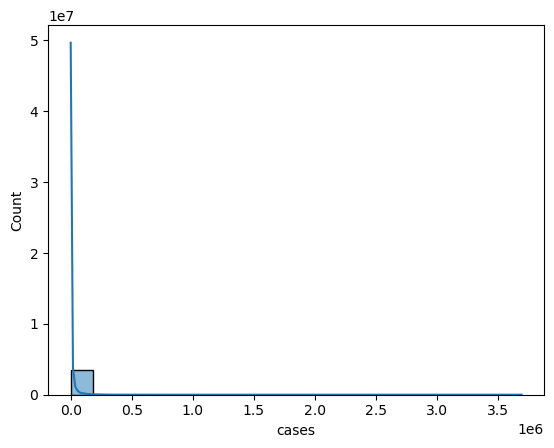

In [54]:
sns.histplot(df['cases'], bins=20, kde = True) # shows extreme values for 'cases'

<Axes: xlabel='deaths', ylabel='Count'>

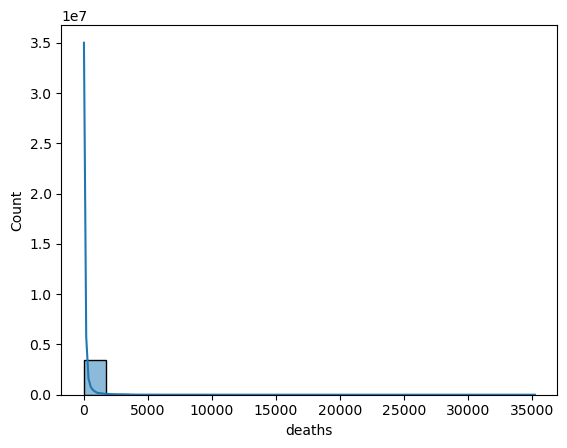

In [55]:
sns.histplot(df['deaths'], bins=20, kde = True) # shows extreme values for 'deaths'

In [39]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['state','cases']]
data_to_plot.head()

,state,cases
0,Alabama,0
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [60]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'cases'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [74]:
map.save('cl_map.html')

In [43]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot_2 = df[['state','deaths','population']]
data_to_plot_2.head()

,state,deaths
0,Alabama,0
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [44]:
# Setup a folium map at a high-level zoom
map_2 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_2,
    columns = ['state', 'deaths'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "deaths").add_to(map_2)
folium.LayerControl().add_to(map_2)

In [45]:
map_2

In [75]:
map.save('cl_map_2.html')

In [67]:
# Create a new column 'death_rate' by dividing 'deaths' by 'population'
df['death_rate'] = df['deaths'] / df['population']

In [68]:
# Setup a Folium map at a high-level zoom
map_3 = folium.Map(location=[100, 0], zoom_start=1.5)


In [69]:
# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to visualize data combinations.
folium.Choropleth(
    geo_data=country_geo,
    data=df,
    columns=['state', 'death_rate'],  # Use the new 'death_rate' column
    key_on='feature.properties.name',  # Check your JSON file to see where the KEY is located
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Death Rate per Population").add_to(map_3)

In [50]:
map_3

In [76]:
map.save('cl_map_3.html')

In [71]:
# Create a new column 'case_rate' by dividing 'deaths' by 'population'
df['cases_rate'] = df['cases'] / df['population']

In [62]:
# Setup a Folium map at a high-level zoom
map_4 = folium.Map(location=[100, 0], zoom_start=1.5)

In [72]:
# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to visualize data combinations.
folium.Choropleth(
    geo_data=country_geo,
    data=df,
    columns=['state', 'cases_rate'],  # Use the new 'death_rate' column
    key_on='feature.properties.name',  # Check your JSON file to see where the KEY is located
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Cases Rate per Population").add_to(map_4)

map_4

In [77]:
map.save('cl_map_4.html')

### Does the analysis answer any of your existing research questions?


#### • Which states saw the most COVID-19 impact?
#### • Does the size of the populaFon affect the percentage of cases and deaths?

##### The analysis gives a clue to answer some of the questions, such as starting to analyze whether population 
##### size has any influence on the rate of new cases and the rate of deaths.
##### Also on which states were most affected by covid cases.

### Does the analysis lead you to any new research questions?

##### No, the analysis didn´t lead me to any new research questions.

In [78]:
# Exporting Merged dataframe
df.to_csv(os.path.join(path,'02 Data', 'Prepared Data','deaths_cases_gender.csv'))